<a href="https://www.kaggle.com/code/shruthiiiee/house-price-prediction?scriptVersionId=138363804" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/california-housing-prices/housing.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('../input/california-housing-prices/housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data=X_train.join(y_train)

In [13]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7009,-118.07,33.97,36.0,1887.0,370.0,1006.0,329.0,3.1554,<1H OCEAN,170700.0
5557,-118.41,33.94,45.0,2038.0,394.0,1086.0,387.0,4.7375,<1H OCEAN,289600.0
19611,-121.13,37.47,37.0,1995.0,448.0,1559.0,443.0,2.1833,INLAND,92700.0
11135,-117.93,33.84,23.0,2870.0,653.0,1680.0,598.0,3.2301,<1H OCEAN,189900.0
18055,-121.99,37.25,22.0,4240.0,532.0,1480.0,514.0,11.2463,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
20064,-118.96,35.87,17.0,1668.0,307.0,888.0,277.0,3.7794,INLAND,96200.0
9549,-120.84,37.43,32.0,2892.0,521.0,1580.0,484.0,3.7784,INLAND,164500.0
7135,-118.10,34.01,42.0,1436.0,298.0,1005.0,298.0,3.4297,<1H OCEAN,195800.0
14088,-117.09,32.76,43.0,3889.0,711.0,1466.0,663.0,3.5529,NEAR OCEAN,223000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

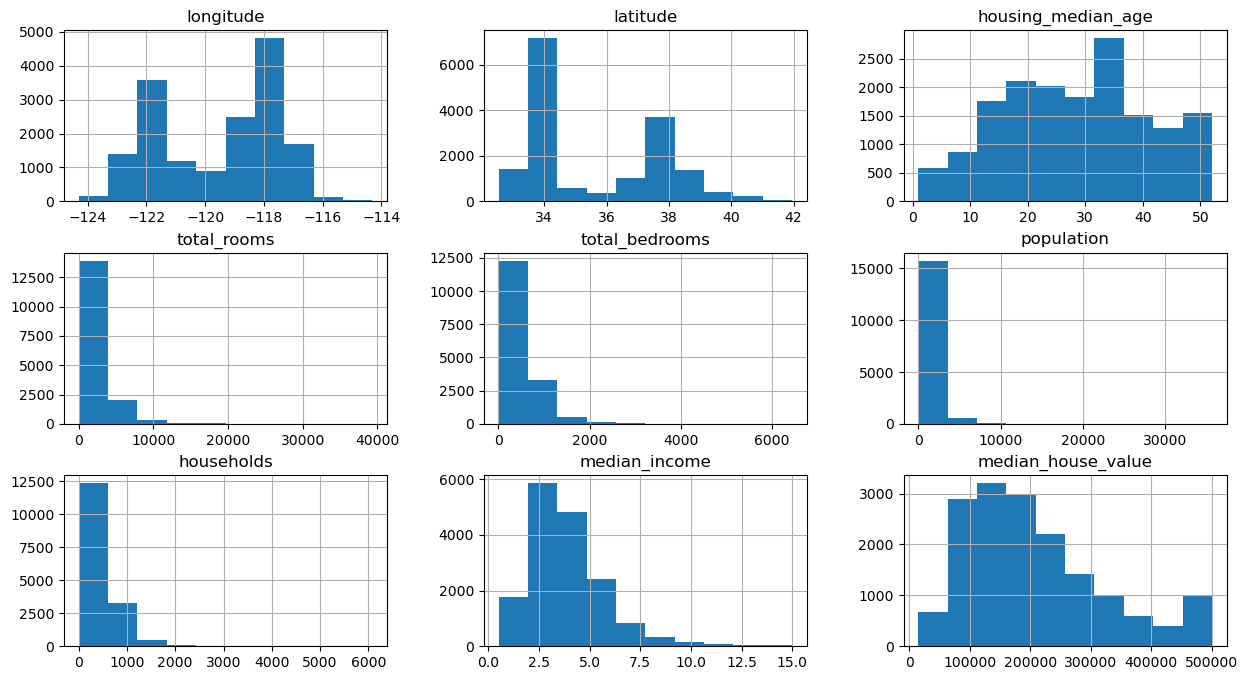

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data.corr()

/tmp/ipykernel_20/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924129,-0.102530,0.040670,0.067017,0.097838,0.053781,-0.020441,-0.052498
latitude,-0.924129,1.000000,0.006750,-0.033181,-0.064259,-0.107135,-0.069975,-0.077003,-0.139642
housing_median_age,-0.102530,0.006750,1.000000,-0.358500,-0.318090,-0.293432,-0.300272,-0.121128,0.102936
total_rooms,0.040670,-0.033181,-0.358500,1.000000,0.931341,0.854256,0.919627,0.196287,0.133503
total_bedrooms,0.067017,-0.064259,-0.318090,0.931341,1.000000,0.873615,0.978751,-0.010452,0.048149
population,0.097838,-0.107135,-0.293432,0.854256,0.873615,1.000000,0.904207,0.003360,-0.026021
households,0.053781,-0.069975,-0.300272,0.919627,0.978751,0.904207,1.000000,0.012201,0.065108
median_income,-0.020441,-0.077003,-0.121128,0.196287,-0.010452,0.003360,0.012201,1.000000,0.690455
median_house_value,-0.052498,-0.139642,0.102936,0.133503,0.048149,-0.026021,0.065108,0.690455,1.000000


/tmp/ipykernel_20/842231939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')


<Axes: >

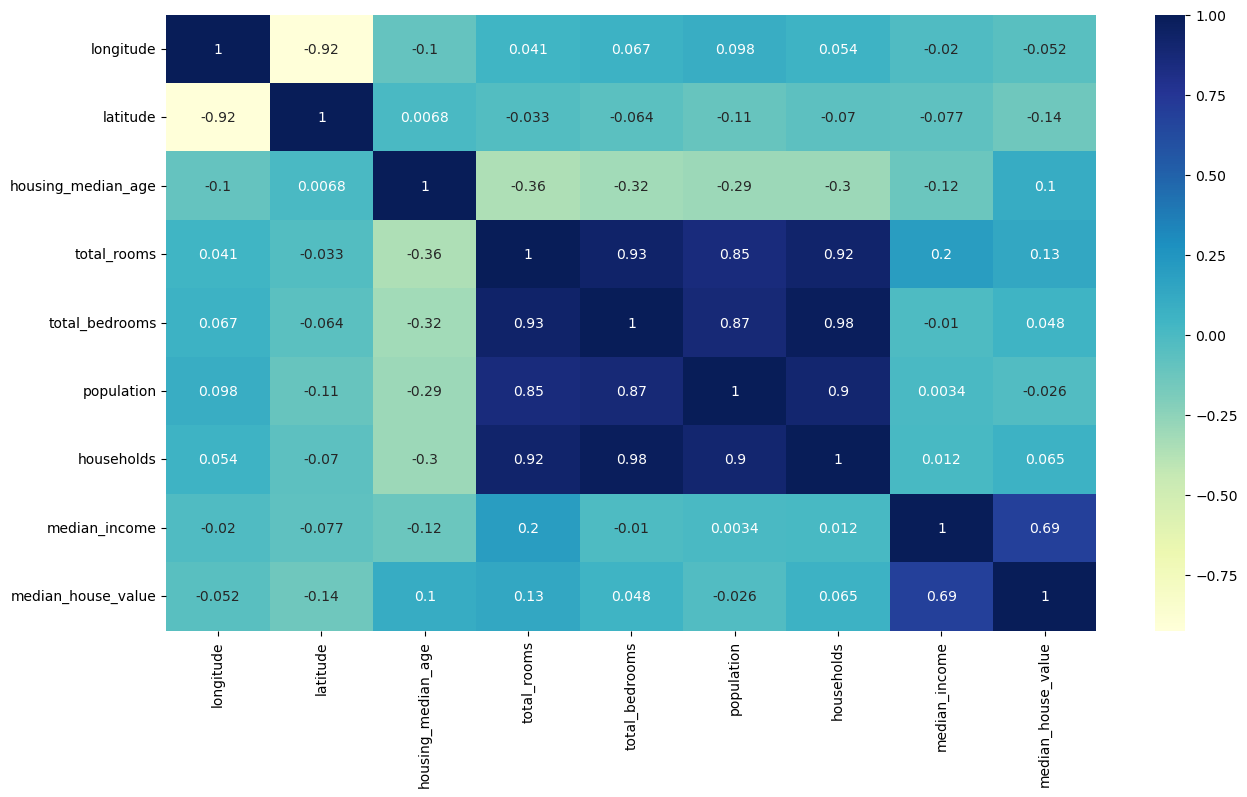

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

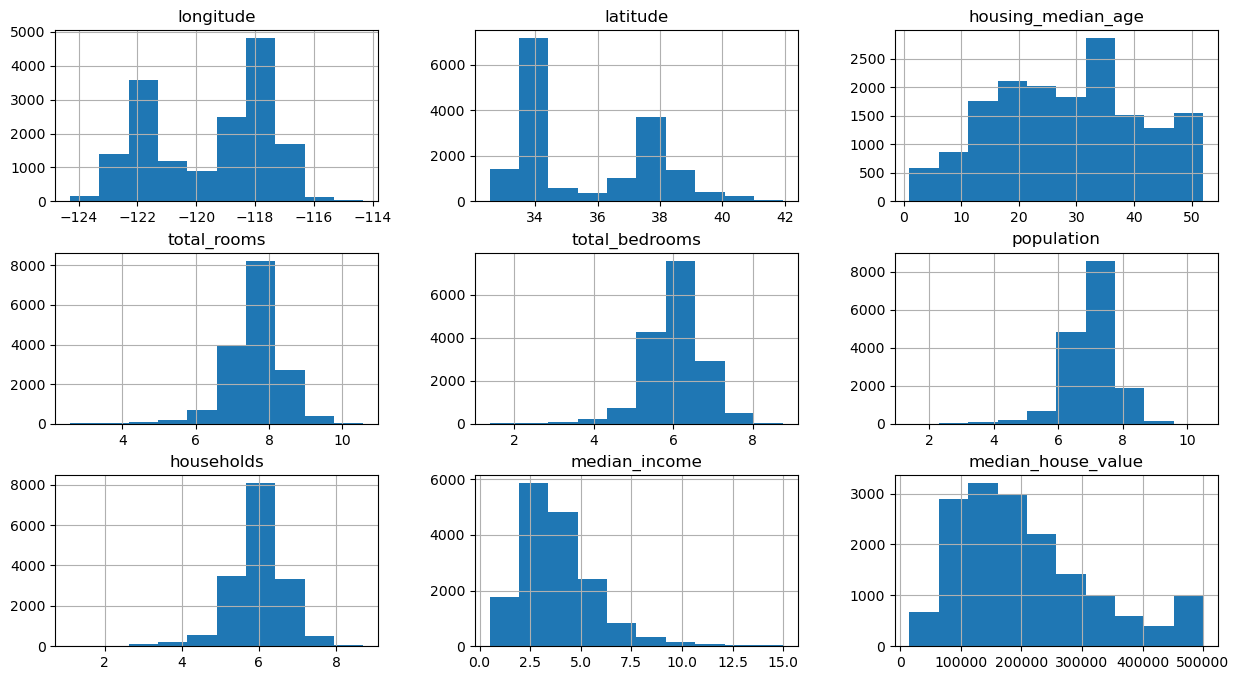

In [18]:
train_data.hist(figsize=(15,8))

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7264
INLAND        5186
NEAR OCEAN    2073
NEAR BAY      1819
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7009,-118.07,33.97,36.0,7.543273,5.916202,6.914731,5.799093,3.1554,170700.0,1,0,0,0,0
5557,-118.41,33.94,45.0,7.620215,5.978886,6.991177,5.961005,4.7375,289600.0,1,0,0,0,0
19611,-121.13,37.47,37.0,7.598900,6.107023,7.352441,6.095825,2.1833,92700.0,0,1,0,0,0
11135,-117.93,33.84,23.0,7.962416,6.483107,7.427144,6.395262,3.2301,189900.0,1,0,0,0,0
18055,-121.99,37.25,22.0,8.352554,6.278521,7.300473,6.244167,11.2463,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20064,-118.96,35.87,17.0,7.419980,5.730100,6.790097,5.627621,3.7794,96200.0,0,1,0,0,0
9549,-120.84,37.43,32.0,7.970049,6.257668,7.365813,6.184149,3.7784,164500.0,0,1,0,0,0
7135,-118.10,34.01,42.0,7.270313,5.700444,6.913737,5.700444,3.4297,195800.0,1,0,0,0,0
14088,-117.09,32.76,43.0,8.266164,6.568078,7.290975,6.498282,3.5529,223000.0,0,0,0,0,1


<Axes: >

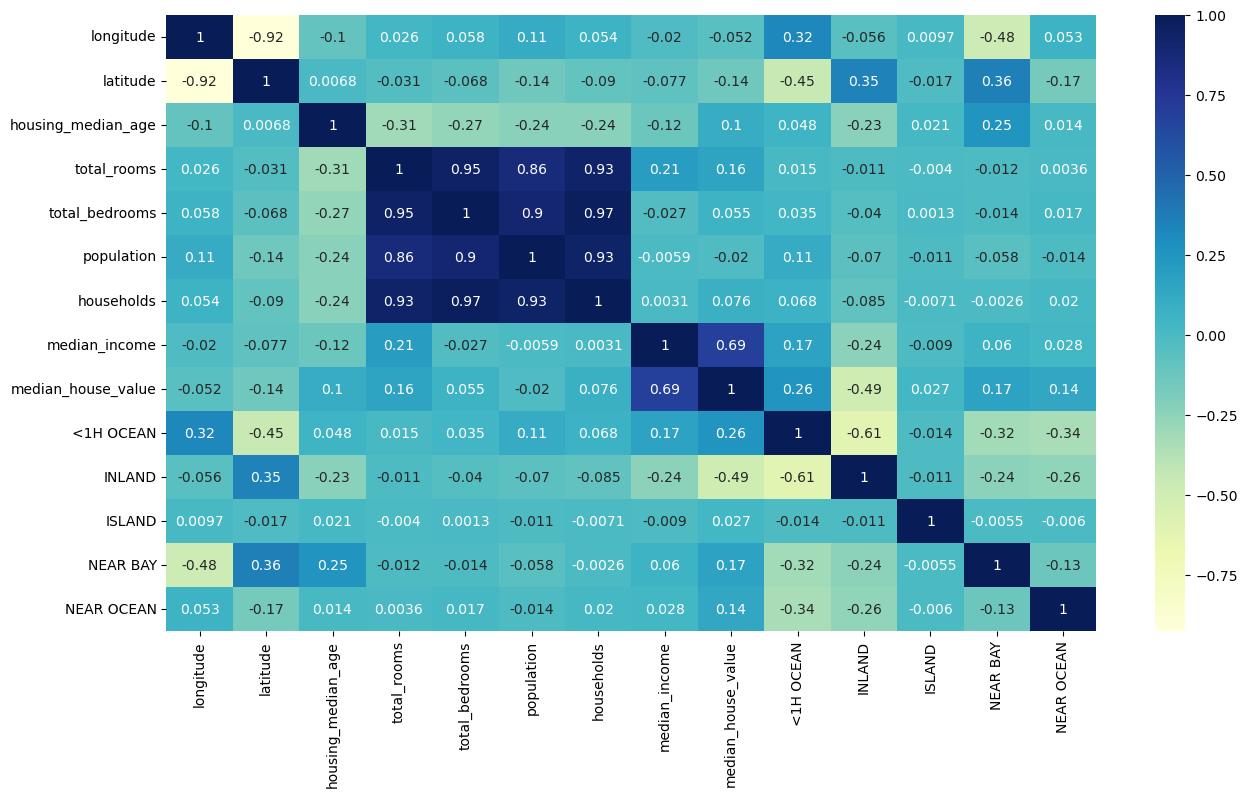

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

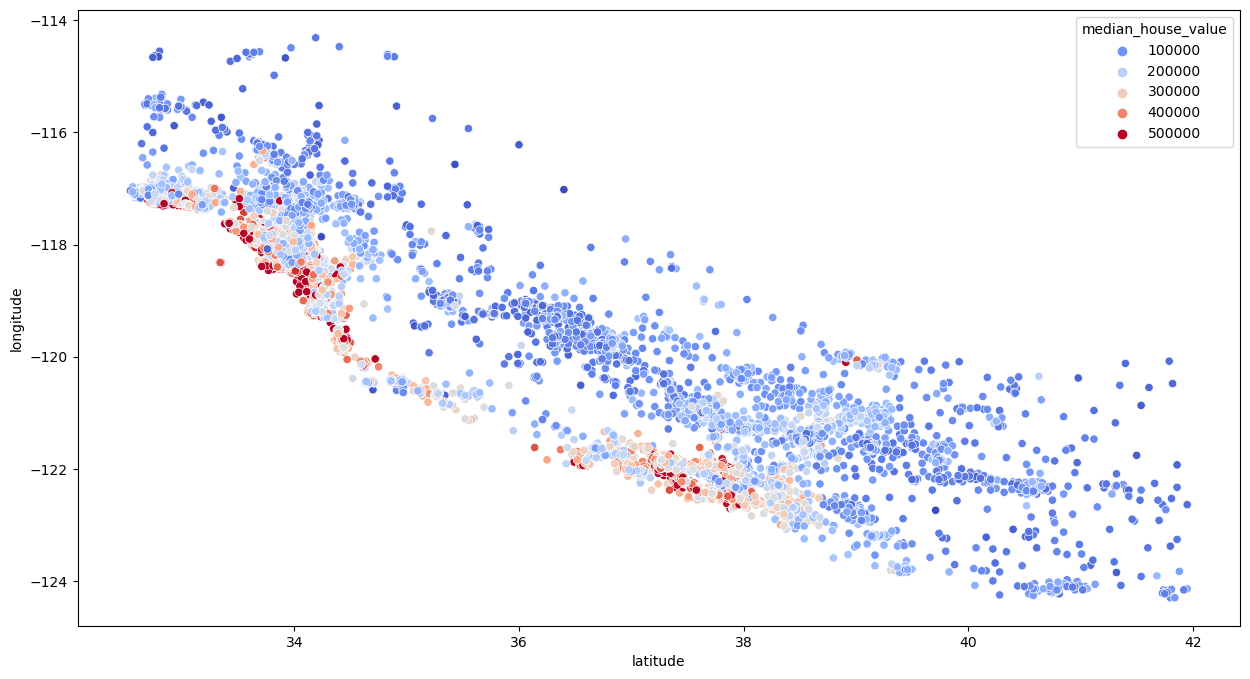

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value",palette="coolwarm")

In [24]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

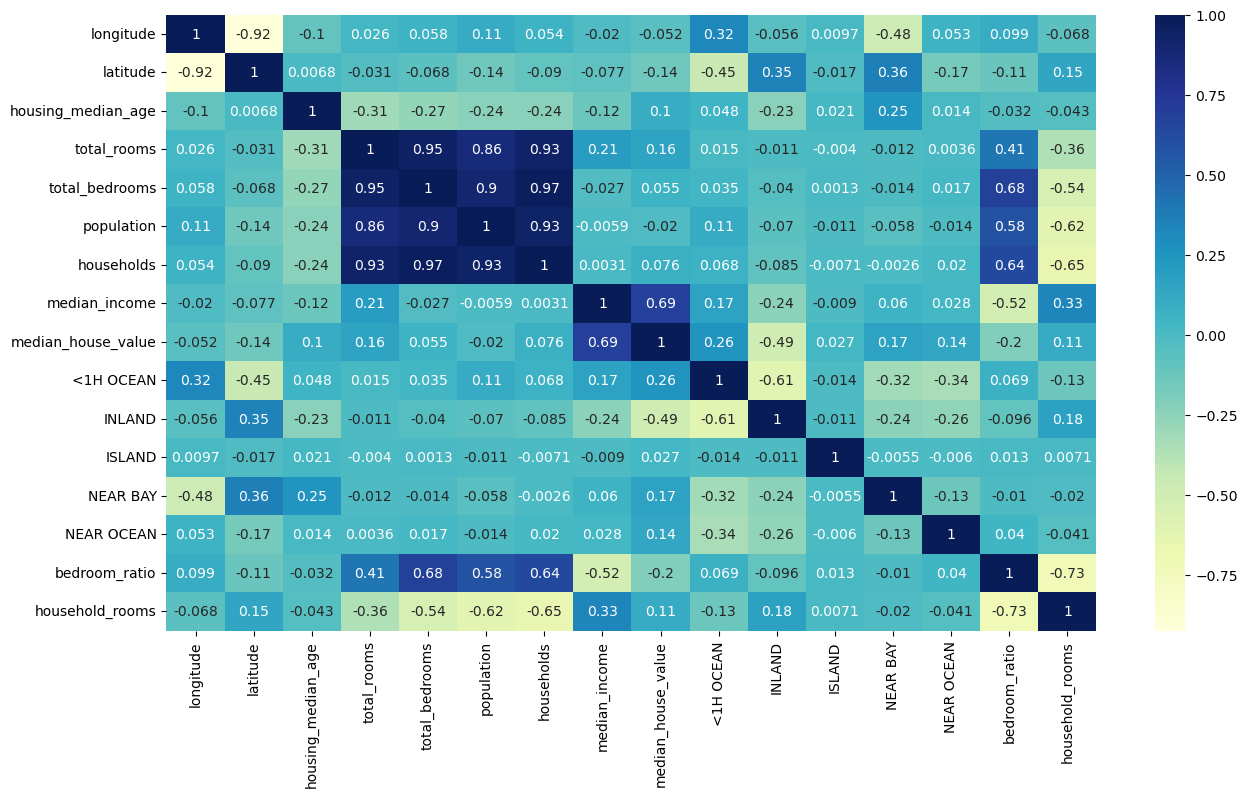

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap='YlGnBu')

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,y_train=train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']
X_test,y_test=test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [28]:
X_test_s=scaler.transform(X_test)

In [29]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
7009,-118.07,33.97,36.0,7.543273,5.916202,6.914731,5.799093,3.1554,170700.0,1,0,0,0,0,0.784302,1.300768
5557,-118.41,33.94,45.0,7.620215,5.978886,6.991177,5.961005,4.7375,289600.0,1,0,0,0,0,0.784609,1.278344
19611,-121.13,37.47,37.0,7.598900,6.107023,7.352441,6.095825,2.1833,92700.0,0,1,0,0,0,0.803672,1.246575
11135,-117.93,33.84,23.0,7.962416,6.483107,7.427144,6.395262,3.2301,189900.0,1,0,0,0,0,0.814214,1.245049
18055,-121.99,37.25,22.0,8.352554,6.278521,7.300473,6.244167,11.2463,500001.0,1,0,0,0,0,0.751689,1.337657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20064,-118.96,35.87,17.0,7.419980,5.730100,6.790097,5.627621,3.7794,96200.0,0,1,0,0,0,0.772253,1.318493
9549,-120.84,37.43,32.0,7.970049,6.257668,7.365813,6.184149,3.7784,164500.0,0,1,0,0,0,0.785148,1.288787
7135,-118.10,34.01,42.0,7.270313,5.700444,6.913737,5.700444,3.4297,195800.0,1,0,0,0,0,0.784071,1.275394
14088,-117.09,32.76,43.0,8.266164,6.568078,7.290975,6.498282,3.5529,223000.0,0,0,0,0,1,0.794574,1.272054


In [30]:
reg.score(X_test, y_test)

0.6521051905282469

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test_s,y_test)

0.8182610943771914

In [33]:
from sklearn.model_selection import GridSearchCV
foret = RandomForestRegressor()
param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [34]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [35]:
grid_search.best_estimator_.score(X_test_s,y_test)

0.8194626810080669